# 8장. 텍스트 빈도 분석 (2)한글단어분석

## 4. 데이터 준비

In [1]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
inputFileName = '아시안컵_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding = 'utf-8').read())

data #작업 확인용 출력

[{'cnt': 1,
  'description': '이후 이강인이 <b>아시안컵</b> 대표팀 내 하극상 논란에 휘말리며 제품에 대한 불매운동 조짐을 보이자 이같이 결정된 것으로 보입니다 이강인은 <b>아시안컵</b> 준결승 전날인 이달 6일 주장 손흥민과 마찰을 빚은 사실이 공개돼... ',
  'link': 'https://www.nocutnews.co.kr/news/6097932',
  'org_link': 'https://www.nocutnews.co.kr/news/6097932',
  'pDate': '2024-02-19 19:29:00',
  'title': '이강인 어쩌나…광고계 너도나도 손절[어텐션 뉴스]'},
 {'cnt': 2,
  'description': '시즌 초반 부상, 항저우 아시안게임 차출로 인한 공백을 딛고 루이스 엔리케 감독 신임을 받았다. 그러다 2023 아시아축구연맹(AFC) 카타르 <b>아시안컵</b>에 차출됐다. 좋은 활약을 선보이며 토너먼트 베스트 일레븐에... ',
  'link': 'http://www.interfootball.co.kr/news/articleView.html?idxno=624743',
  'org_link': 'http://www.interfootball.co.kr/news/articleView.html?idxno=624743',
  'pDate': '2024-02-19 19:29:00',
  'title': "'아직 못 잊었다'...라리가, 이강인 23번째 생일 축하→발렌시아-마요르카 시..."},
 {'cnt': 3,
  'description': '<b>아시안컵</b> 내분의 중심에 선 이강인을 향한 도를 넘는 비난이 계속되는 가운데, 이를 수수방관하고 있는 대한축구협회에 대한 책임론도 점점 높아지고 있습니다. 축구협회는 진상 조사 계획조차 없는 것으로 알려졌습니다.... ',
  'link': 'https://news.kbs.co.kr/news/pc/view/view.do?ncd=78936

In [3]:
description = ''
for item in data:
    if 'description' in item.keys():
        description = description + re.sub(r'[^\w]', ' ', item['description']) +' '
        
description #작업 확인용 출력

'이후 이강인이  b 아시안컵  b  대표팀 내 하극상 논란에 휘말리며 제품에 대한 불매운동 조짐을 보이자 이같이 결정된 것으로 보입니다 이강인은  b 아시안컵  b  준결승 전날인 이달 6일 주장 손흥민과 마찰을 빚은 사실이 공개돼     시즌 초반 부상  항저우 아시안게임 차출로 인한 공백을 딛고 루이스 엔리케 감독 신임을 받았다  그러다 2023 아시아축구연맹 AFC  카타르  b 아시안컵  b 에 차출됐다  좋은 활약을 선보이며 토너먼트 베스트 일레븐에      b 아시안컵  b  내분의 중심에 선 이강인을 향한 도를 넘는 비난이 계속되는 가운데  이를 수수방관하고 있는 대한축구협회에 대한 책임론도 점점 높아지고 있습니다  축구협회는 진상 조사 계획조차 없는 것으로 알려졌습니다      손흥민은 구단 인터뷰를 통해 인생에서 가장 힘든 시기가  b 아시안컵  b  이후였다고 에둘러 말했지만  이번 사태와 관련한 구체적 언급은 아직 없습니다   lt 손흥민   토트넘 주장 gt   quot 인생에서 가장 힘들다고 할 수 있는 한      b 아시안컵  b  4강전 전날 손흥민과 이강인의 충돌설이 알려진 직후부터 이들 기업의 유튜브와 SNS 계정에는 이강인과의 광고계약을 해지하라는 내용의 악성 댓글이 쏟아지고 있다  공교롭게도 KT는 탁구게이트 보도 이후     하지만 이강인이 대표팀 주장 손흥민 토트넘  등과 함께 요르단과의  b 아시안컵  b  4강전 직전 발생한 선수단 내분    한편  지난 14일 한국시간  영국 대중지 더선은 손흥민이  b 아시안컵  b  준결승 전날 저녁 후배들과 언쟁 과정에서     무엇보다 2023 아시아축구연맹 AFC  카타르  b 아시안컵  b  실패가 클린스만 경질의 결정적인 역할을 했다  한국은    클린스만호는  b 아시안컵  b  아쉬운 성적뿐 아니라  대회 기간 내내 경기력 부진에 시달렸다  조별리그에서  130위     최근  b 아시안컵  b 이 끝났어요  문지환 선수도 목표했던 대회였는데  지켜보면서 마음이 싱

In [4]:
nlp = Okt()
description_N = nlp.nouns(description)
description_N #작업 확인용 출력

['이후',
 '이강인',
 '아시안컵',
 '대표팀',
 '내',
 '극상',
 '논란',
 '휘',
 '말리',
 '제품',
 '대한',
 '불매운동',
 '조짐',
 '보이',
 '결정',
 '것',
 '이강인',
 '아시안컵',
 '준결승',
 '전날',
 '달',
 '주장',
 '손흥민',
 '마찰',
 '빚',
 '사실',
 '공개',
 '시즌',
 '초반',
 '부상',
 '항저우',
 '아시안',
 '게임',
 '차출',
 '공백',
 '루이스',
 '엔리케',
 '감독',
 '신임',
 '아시아',
 '축구',
 '연맹',
 '카타르',
 '아시안컵',
 '차출',
 '활약',
 '토너먼트',
 '베스트',
 '일레븐',
 '아시안컵',
 '내분',
 '중심',
 '선',
 '이강인',
 '향',
 '비난',
 '계속',
 '가운데',
 '수수방관',
 '축구',
 '협회',
 '대한',
 '책임',
 '론도',
 '점점',
 '축구',
 '협회',
 '진상',
 '조사',
 '계획',
 '것',
 '손흥민',
 '구단',
 '인터뷰',
 '통해',
 '인생',
 '가장',
 '시기',
 '아시안컵',
 '이후',
 '말',
 '이번',
 '사태',
 '관련',
 '구체',
 '언급',
 '손흥민',
 '토트넘',
 '주장',
 '인생',
 '가장',
 '수',
 '아시안컵',
 '강전',
 '전날',
 '손흥민',
 '이강인',
 '충돌',
 '설',
 '직후',
 '이',
 '기업',
 '유튜브',
 '계정',
 '이강인',
 '광고',
 '계약',
 '해지',
 '내용',
 '악성',
 '댓글',
 '공교',
 '롭',
 '도',
 '탁구',
 '게이트',
 '보도',
 '이후',
 '이강인',
 '대표팀',
 '주장',
 '손흥민',
 '토트넘',
 '등',
 '요르단',
 '아시안컵',
 '강전',
 '직전',
 '발생',
 '선수단',
 '내분',
 '한편',
 '지난',
 '한국',
 '시간',
 '영국',
 '대중',
 '더선',

##  5. 데이터 탐색 및 분석 모델 구축

In [5]:
count = Counter(description_N)
count #작업 확인용 출력

Counter({'아시안컵': 1397,
         '축구': 698,
         '손흥민': 586,
         '이강인': 559,
         '대표팀': 386,
         '전': 331,
         '연맹': 323,
         '아시아': 315,
         '카타르': 309,
         '한국': 309,
         '클린스만': 300,
         '감독': 294,
         '지난': 276,
         '선수': 272,
         '경기': 266,
         '요르단': 238,
         '이': 199,
         '준결승': 196,
         '강': 191,
         '팀': 177,
         '이후': 172,
         '등': 161,
         '전날': 147,
         '탈락': 139,
         '것': 138,
         '강전': 130,
         '출전': 130,
         '그': 129,
         '토트넘': 125,
         '주장': 122,
         '충돌': 117,
         '후': 113,
         '아시안': 106,
         '복귀': 104,
         '논란': 102,
         '시간': 102,
         '대회': 102,
         '뒤': 100,
         '탁구': 99,
         '리그': 96,
         '우승': 95,
         '파리': 94,
         '찬': 93,
         '황희': 92,
         '협회': 81,
         '선발': 81,
         '이번': 80,
         '생제르맹': 80,
         '매체': 79,
         '경질': 76,
      

In [6]:
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

아시안컵 : 1397
축구 : 698
손흥민 : 586
이강인 : 559
대표팀 : 386
연맹 : 323
아시아 : 315
카타르 : 309
한국 : 309
클린스만 : 300
감독 : 294
지난 : 276
선수 : 272
경기 : 266
요르단 : 238
준결승 : 196
이후 : 172
전날 : 147
탈락 : 139
강전 : 130
출전 : 130
토트넘 : 125
주장 : 122
충돌 : 117
아시안 : 106
복귀 : 104
논란 : 102
시간 : 102
대회 : 102
탁구 : 99
리그 : 96
우승 : 95
파리 : 94
황희 : 92
협회 : 81
선발 : 81
이번 : 80
생제르맹 : 80
매체 : 79
경질 : 76
저녁 : 72
부상 : 70
게임 : 70
위르겐 : 70
통해 : 68
보도 : 68
내분 : 67
손가락 : 66
대한 : 65
기간 : 65
최근 : 65
영국 : 61
결과 : 61
국가대표팀 : 57
국가대표 : 56
태국 : 56
코치 : 56
사실 : 55
가운데 : 55
식사 : 54
사진 : 54
앞서 : 53
비판 : 52
모습 : 52
현지 : 52
활약 : 51
베트남 : 51
직후 : 50
해임 : 49
물리 : 49
소화 : 48
독일 : 48
마치 : 48
당시 : 47
대해 : 45
소속 : 44
갈등 : 43
다툼 : 43
배구 : 42
게이트 : 41
한편 : 41
회장 : 41


In [7]:
plt.rc('font', family='Malgun Gothic')

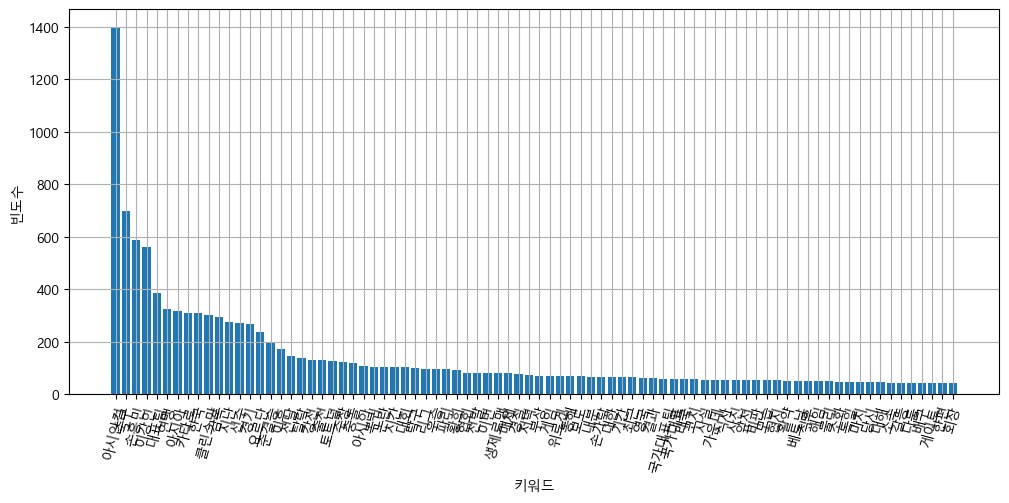

In [8]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

## 6. 결과 시각화

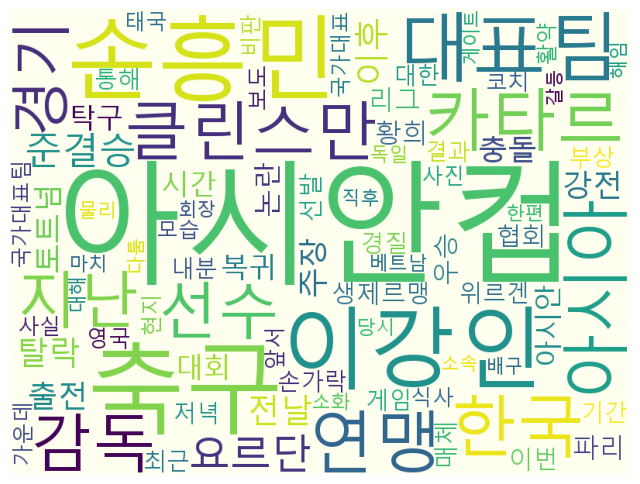

In [13]:
font_path = "C:/Windows/Fonts/malgun.ttf"
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [14]:
cloud.to_file('8장_data/'+inputFileName + '_cloud.jpg')